# Air Quality Assessment

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

## Data Collection

In [107]:
path = r"C:\Users\ameya\GitHub\AirQualityAssement_Classifier\Dataset\smoke_detection_iot.csv"
df_air = pd.read_csv(path)
df_air.info()
df_air.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      62630 non-null  int64  
 1   UTC             62630 non-null  int64  
 2   Temperature[C]  62630 non-null  float64
 3   Humidity[%]     62630 non-null  float64
 4   TVOC[ppb]       62630 non-null  int64  
 5   eCO2[ppm]       62630 non-null  int64  
 6   Raw H2          62630 non-null  int64  
 7   Raw Ethanol     62630 non-null  int64  
 8   Pressure[hPa]   62630 non-null  float64
 9   PM1.0           62630 non-null  float64
 10  PM2.5           62630 non-null  float64
 11  NC0.5           62630 non-null  float64
 12  NC1.0           62630 non-null  float64
 13  NC2.5           62630 non-null  float64
 14  CNT             62630 non-null  int64  
 15  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 7.6 MB


,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [108]:
df_air.shape

(62630, 16)

In [109]:
df_air.describe()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
count,62630.000000,6.263000e+04,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,31314.500000,1.654792e+09,15.970424,48.539499,1942.057528,670.021044,12942.453936,19754.257912,938.627649,100.594309,184.467770,491.463608,203.586487,80.049042,10511.386157,0.714626
std,18079.868017,1.100025e+05,14.359576,8.865367,7811.589055,1905.885439,272.464305,609.513156,1.331344,922.524245,1976.305615,4265.661251,2214.738556,1083.383189,7597.870997,0.451596
min,0.000000,1.654712e+09,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15657.250000,1.654743e+09,10.994250,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.340000,8.820000,1.384000,0.033000,3625.250000,0.000000
50%,31314.500000,1.654762e+09,20.130000,50.150000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.943000,0.044000,9336.000000,1.000000
75%,46971.750000,1.654778e+09,25.409500,53.240000,1189.000000,438.000000,13109.000000,20078.000000,939.418000,2.090000,2.180000,14.420000,2.249000,0.051000,17164.750000,1.000000
max,62629.000000,1.655130e+09,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,24993.000000,1.000000


In [110]:
FEATURES_irrelavent = ['Unnamed: 0','UTC','CNT']
df =df_air.drop(columns=['Unnamed: 0','UTC','CNT'],
                axis=1)

<AxesSubplot:>

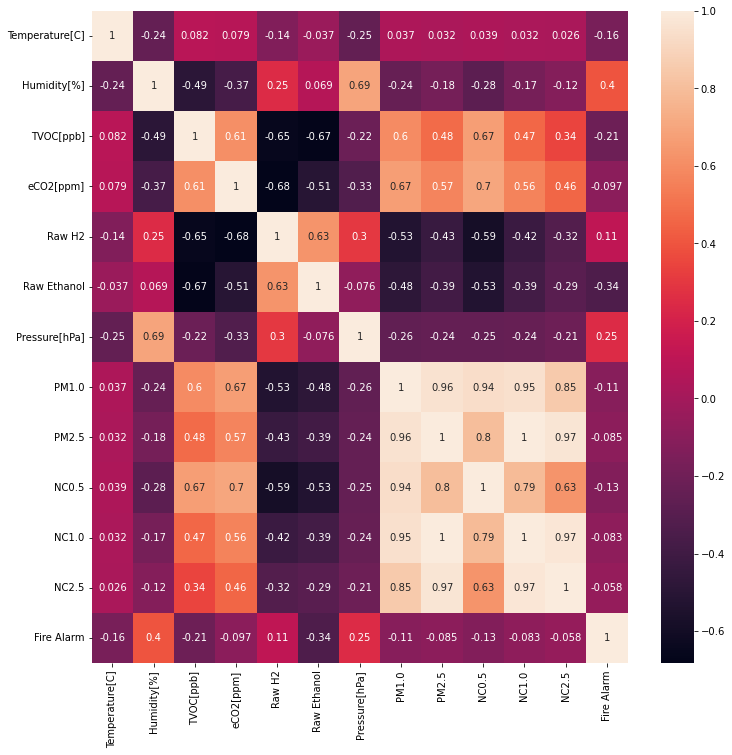

In [111]:
plt.figure(figsize = (12,12))
sns.heatmap(df.corr(),annot = True,)

In [112]:
X = df.copy(); X.drop('Fire Alarm',axis = 1,inplace = True)
y = df['Fire Alarm']

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler; scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    train_size = 0.8,
                                                    random_state=0)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0)
model_log = model.fit(X_train, y_train)

SENSITIVITY = 0.9517
SPECIFICITY = 0.7653
PRECESION   = 0.9094
F_SCORE     = 0.9301
---------------CLASSIFICATION REPORT---------------
              precision    recall  f1-score   support

           0       0.86      0.77      0.81      3605
           1       0.91      0.95      0.93      8921

    accuracy                           0.90     12526
   macro avg       0.89      0.86      0.87     12526
weighted avg       0.90      0.90      0.90     12526



c:\Users\ameya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


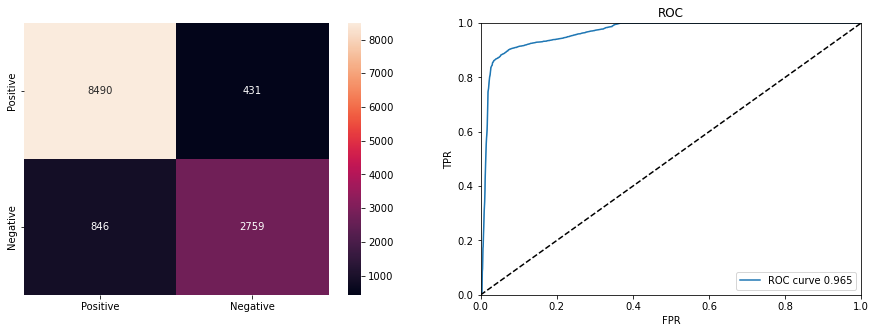

In [126]:
def draw_cm(model, X_test, y_test,):
    
    # Predictions
    df = pd.DataFrame({
                        'Y_TEST': y_test,
                        'Y_PRED': model.predict(X_test).tolist(),                       
                      })
    df = df.reset_index()
    df['Y_PROB'] = pd.DataFrame( model.predict_proba(X_test) ).iloc[:,1:2]
  
    # Metrics
    from sklearn import metrics
    cm = metrics.confusion_matrix(df['Y_TEST'], df['Y_PRED'], labels=[1,0]);
    TP, FP, TN, FN = cm[0,0], cm[1,0], cm[1,1], cm[0,1]
    SENSITIVITY = np.round(  TP / ( TP + FN ), 4 )
    SPECIFICITY = np.round(  TN / ( TN + FP ), 4 )
    PRECESION   = np.round(  TP / ( TP + FP ), 4 )
    print( 'SENSITIVITY =', np.round(  TP / ( TP + FN ), 4 ))
    print( 'SPECIFICITY =', np.round(  TN / ( TN + FP ), 4 ))
    print( 'PRECESION   =', np.round(  TP / ( TP + FP ), 4 ))
    print( 'F_SCORE     =', np.round(  2 * SENSITIVITY * PRECESION / (SENSITIVITY + PRECESION), 4))
    print( '---------------CLASSIFICATION REPORT---------------' )
    print( metrics.classification_report(df['Y_TEST'], df['Y_PRED']) )

    fig, (ax0, ax1,) = plt.subplots(nrows=1, ncols=2, 
                                        sharex=False, figsize=(15, 5));
    
    # Confusion Metrics
    from sklearn import metrics
    cm = metrics.confusion_matrix(df['Y_TEST'], df['Y_PRED'], labels=[1,0])
    sns.heatmap(cm,
                annot = True,
                fmt='.0f',
                xticklabels=['Positive','Negative'],
                yticklabels=['Positive','Negative'],
                ax = ax0,
                )
    plt.ylabel('Actual'); plt.xlabel('Predicted'); #plt.show()

    fpr, tpr, thresholds = metrics.roc_curve(df['Y_TEST'],
                                             df['Y_PROB'],
                                             drop_intermediate=False
                                            )

    auc_score = metrics.roc_auc_score(df['Y_TEST'],
                                  df['Y_PROB']
                                  )

    #plt.figure(figsize=(8,6))
    sns.lineplot(fpr, tpr, label='ROC curve %0.3f' %auc_score, ax =ax1)
    plt.plot([0,1], [0,1], 'k--')
    plt.xlim([0,1]), plt.ylim([0,1])  
    plt.xlabel("FPR"); plt.ylabel("TPR")
    plt.title('ROC'); plt.legend(); plt.show()

draw_cm(model_log, X_test, y_test)

SENSITIVITY = 0.998
SPECIFICITY = 0.9847
PRECESION   = 0.9939
F_SCORE     = 0.9959
---------------CLASSIFICATION REPORT---------------
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3605
           1       0.99      1.00      1.00      8921

    accuracy                           0.99     12526
   macro avg       0.99      0.99      0.99     12526
weighted avg       0.99      0.99      0.99     12526



c:\Users\ameya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


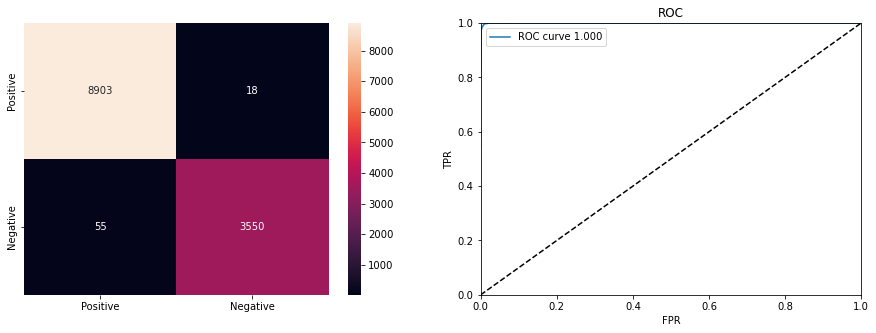

In [130]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(100)
clf_knn = model.fit(X_train, y_train)
draw_cm(clf_knn, X_test, y_test)

In [128]:
from sklearn.linear_model import SGDClassifier
model = SGDClassifier()
clf_sgd = model.fit(X_train, y_train)
#draw_cm(clf_sgd, X_test, y_test)

In [ ]:
clf_sgd.predict_proba(X_test)